In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots


import matplotlib.pyplot as plt
%matplotlib inline

fileNameTrain = 'train.csv'
fileNameTest  = 'test.csv'

dfTrain = pd.read_csv(fileNameTrain)
dfTest  = pd.read_csv(fileNameTest)

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline

from sklearn.kernel_ridge import KernelRidge
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone

import xgboost as xgb
from xgboost import XGBRegressor
from xgboost import XGBClassifier

import plotly.express as px
import plotly.graph_objects as go

import seaborn as sns; sns.set(style="ticks", color_codes=True)

import lightgbm as lgb
print(lgb.__version__)

2.2.3


In [4]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_rows", 40)
dfTrain

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2008        WD         Normal     208500  
1         5   2007        WD         Normal     181500  
2         9   2008        WD         Normal     223500  
3         2   2006        WD        Abnorml     140000  
4        12   2008        WD         Normal     250000  
...     ...    ...       ...            ...        ...  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[1460 rows x 81 columns]

In [5]:
dfTrain.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [6]:
prop = 'SalePrice'
print(sum(dfTrain[prop].isna()))
print(sum(dfTrain[prop].isnull()))
dfTrain[dfTrain[prop]>600000]

0
0


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
691    692          60       RL        104.0    21535   Pave   NaN      IR1   
898    899          20       RL        100.0    12919   Pave   NaN      IR1   
1169  1170          60       RL        118.0    35760   Pave   NaN      IR1   
1182  1183          60       RL        160.0    15623   Pave   NaN      IR1   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
691          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
898          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1169         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1182         Lvl    AllPub  ...      555     Ex  MnPrv         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
691       1   2007        WD         Normal     755000  
898       3   2010       New        Partial     611657  
1169      7   2006        WD         Normal     625000  
1182      7   2007        WD        Abnorml     745000  

[4 rows x 81 columns]

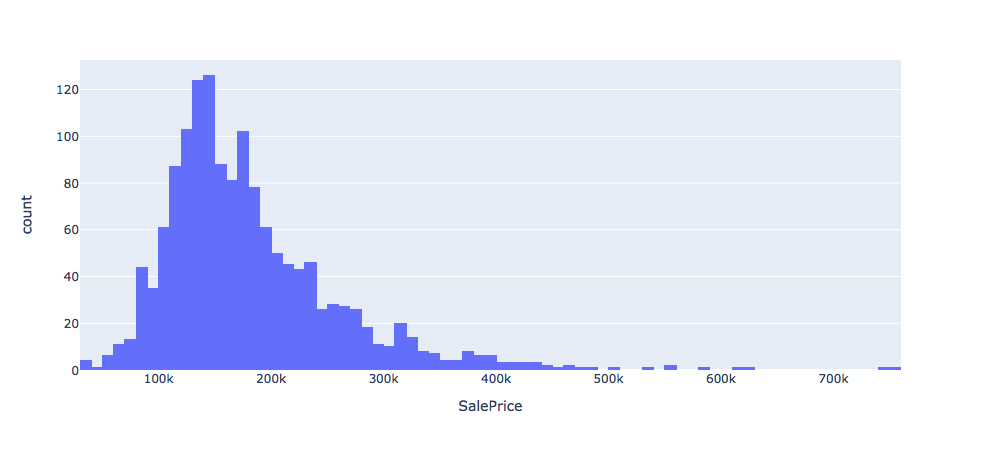

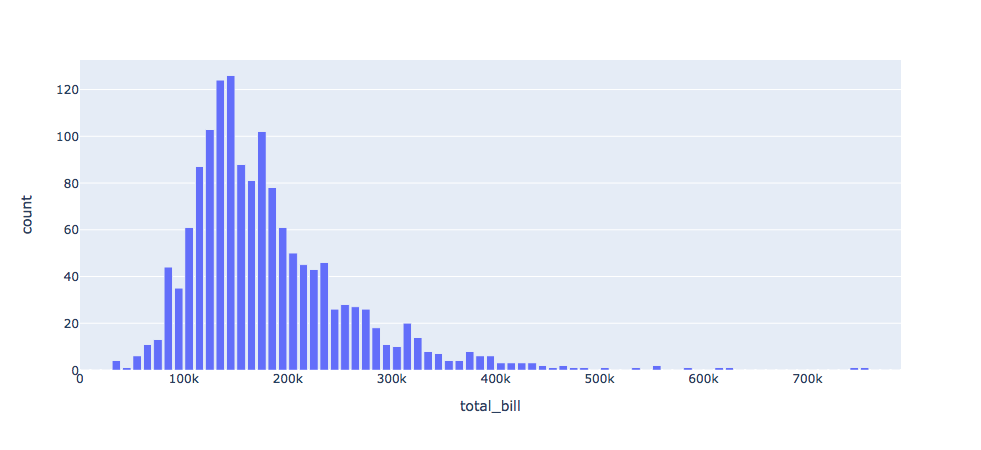

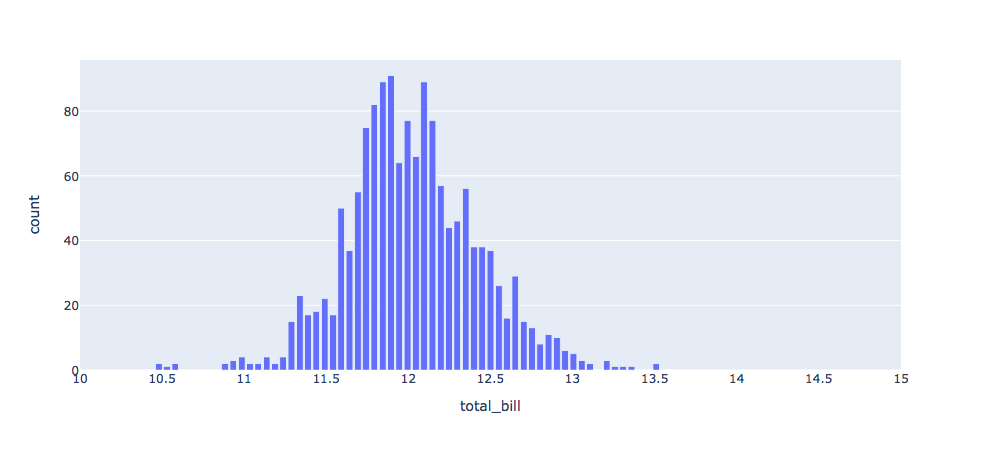

In [7]:
fig = px.histogram(dfTrain, x="SalePrice")
fig.show()

counts, bins = np.histogram(dfTrain.SalePrice, bins=range(0, 800000, 10000))
bins = 0.5 * (bins[:-1] + bins[1:])
fig = px.bar(x=bins, y=counts, labels={'x':'total_bill', 'y':'count'})
fig.show()

counts, bins = np.histogram(np.log(dfTrain.SalePrice), bins=np.linspace(10, 15, 100))
bins = 0.5 * (bins[:-1] + bins[1:])
fig = px.bar(x=bins, y=counts, labels={'x':'total_bill', 'y':'count'})
fig.show()

81


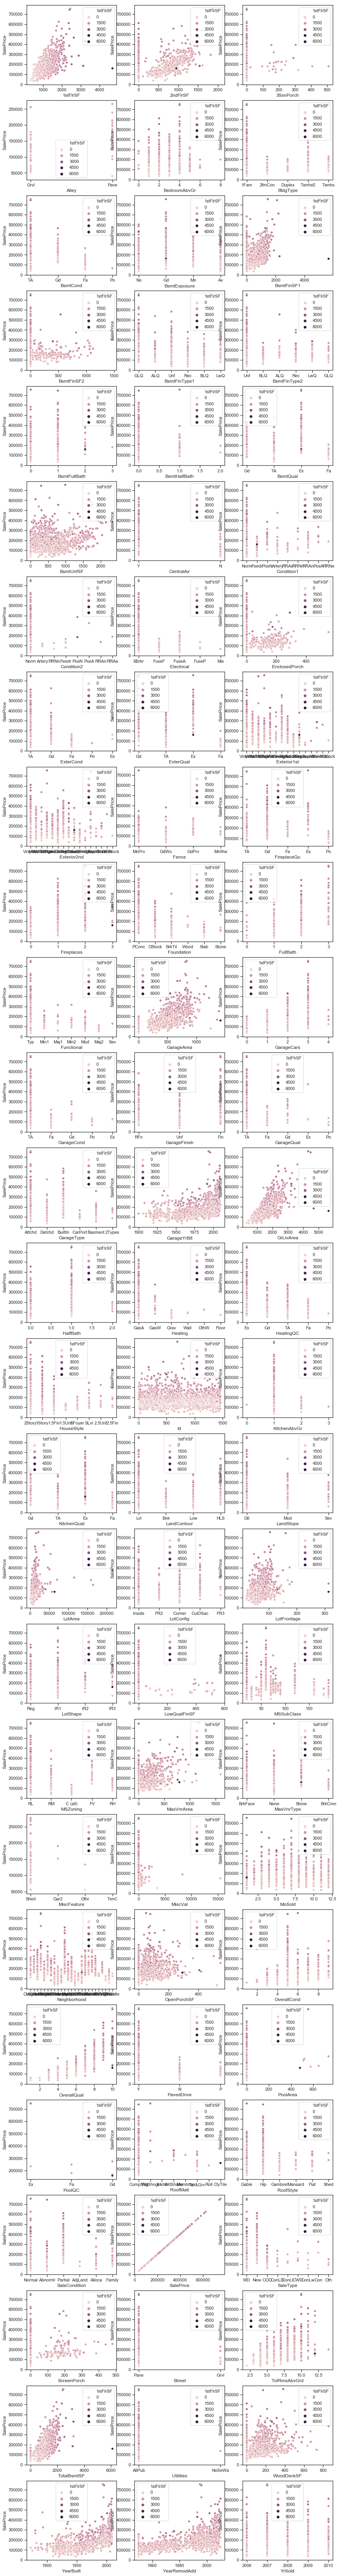

In [8]:
NROWS=27
NCOLS=3
colNames=sorted(dfTrain.columns)
print(len(colNames))
fig, axAll = plt.subplots(nrows=NROWS, ncols=NCOLS, figsize=(14,120))
idx=0
for r in range(NROWS):
    for c in range(NCOLS):
        #sns.regplot(x=colNames[idx],y = 'SalePrice',data = dfTrain,scatter= True, fit_reg=True, ax=axAll[r,c])
        sns.scatterplot(x=colNames[idx],y = 'SalePrice',data = dfTrain,ax=axAll[r,c],hue="1stFlrSF")
        #sns.violinplot(x=colNames[idx],y = 'SalePrice',data = dfTrain,ax=axAll[r,c])
        idx=idx+1

In [10]:
sorted(dfTrain.columns)

['1stFlrSF',
 '2ndFlrSF',
 '3SsnPorch',
 'Alley',
 'BedroomAbvGr',
 'BldgType',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtFullBath',
 'BsmtHalfBath',
 'BsmtQual',
 'BsmtUnfSF',
 'CentralAir',
 'Condition1',
 'Condition2',
 'Electrical',
 'EnclosedPorch',
 'ExterCond',
 'ExterQual',
 'Exterior1st',
 'Exterior2nd',
 'Fence',
 'FireplaceQu',
 'Fireplaces',
 'Foundation',
 'FullBath',
 'Functional',
 'GarageArea',
 'GarageCars',
 'GarageCond',
 'GarageFinish',
 'GarageQual',
 'GarageType',
 'GarageYrBlt',
 'GrLivArea',
 'HalfBath',
 'Heating',
 'HeatingQC',
 'HouseStyle',
 'Id',
 'KitchenAbvGr',
 'KitchenQual',
 'LandContour',
 'LandSlope',
 'LotArea',
 'LotConfig',
 'LotFrontage',
 'LotShape',
 'LowQualFinSF',
 'MSSubClass',
 'MSZoning',
 'MasVnrArea',
 'MasVnrType',
 'MiscFeature',
 'MiscVal',
 'MoSold',
 'Neighborhood',
 'OpenPorchSF',
 'OverallCond',
 'OverallQual',
 'PavedDrive',
 'PoolArea',
 'PoolQC',
 'RoofMatl',
 'RoofStyle

In [9]:
cols=['KitchenQual','GarageType','Neighborhood','CentralAir','Condition1','PavedDrive',
      'MSZoning','LandContour','LandSlope','HouseStyle','ExterQual','ExterCond',
      'Foundation','BsmtCond','Electrical','BedroomAbvGr','SaleType','SaleCondition',
      'LotConfig','Heating','HeatingQC','BsmtExposure', 'OverallQual','BsmtQual','RoofStyle',
     'BldgType','LotShape','MasVnrType','TotRmsAbvGrd','Functional','BsmtFinType1']

for col in cols:
    df=dfTrain[col].append(dfTest[col])
    #print(df.value_counts(dropna=False))

    propDict = {}
    for k,prop in enumerate(set(df)):
        propDict[prop]=k
    propDict[np.nan]=0
    
    # Manuel version    
    for dataset in [dfTrain, dfTest]:
        dataset[col+'_xx'] = dataset[col].map(propDict).astype(int)

dfTest.at[1116,'GarageCars']=0
dfTest.at[660,'TotalBsmtSF']=0
        
for dataset in [dfTrain, dfTest]:
    dataset['TotalSF'] = dataset['TotalBsmtSF'] + dataset['1stFlrSF'] + dataset['2ndFlrSF']

for dataset in [dfTrain]:
    dataset['SalePriceLog'] = np.log(dataset['SalePrice'])

In [38]:
dfToInvestigate = X#Test
print(np.any(np.isnan(dfToInvestigate)))
print(np.any(np.isfinite(dfToInvestigate)))

print(np.where(np.any(np.isnan(dfToInvestigate))))
print(np.where(np.any(np.isfinite(dfToInvestigate))))

False
True
(array([], dtype=int64),)
(array([0]),)


TA    1798
Gd     979
Ex     107
Fa      35
Name: ExterQual, dtype: int64
2919 2919


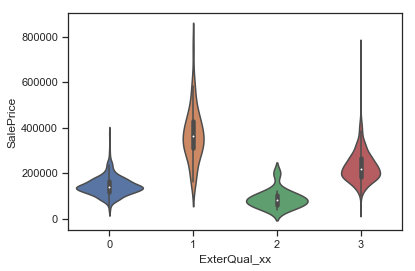

In [12]:
col='ExterQual'
df=dfTrain[col].append(dfTest[col])
print(df.value_counts(dropna=False))
print(sum(df.value_counts(dropna=False)),df.shape[0])

qualDict = {}
for k,cd in enumerate(set(df)):
    qualDict[cd]=k
qualDict[np.nan]=10

# Manuel version    
for dataset in [dfTrain, dfTest]:
    dataset[col+'_xx'] = dataset[col].map(qualDict).astype(int)
    
sns.violinplot(x=col+'_xx', y='SalePrice', data=dfTrain)



In [15]:
lassoModel = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

ENetModel = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

KRRModel = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

rfModel = RandomForestRegressor(n_estimators=400, 
                                   #criterion='entropy',
                                   #max_features='sqrt',
                                   #criterion='gini',
                                   #max_features='auto',
                                   #oob_score=True,
                                   random_state=0,
                                   min_samples_split=5,
                                   min_samples_leaf=5,
                                   max_depth=6,
                                   n_jobs=-1)

GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

xgboostModel = XGBRegressor(objective ='reg:squarederror',
                        n_estimators=1400,
                        learning_rate=0.05,
                        n_jobs=-1)

xgboostModel = XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)
lgbModel = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [16]:
#feature_names = ['LotArea','YearBuilt','1stFlrSF','2ndFlrSF','FullBath','BedroomAbvGr','TotRmsAbvGrd']
feature_names = ['LotArea','GrLivArea','TotalSF','BedroomAbvGr_xx','FullBath',
                 'Neighborhood_xx',
                 'GarageCars','GarageType_xx',
                 'OverallQual_xx','KitchenQual_xx','ExterQual_xx',
                 'CentralAir_xx','Fireplaces','Heating_xx',
                 'BsmtExposure_xx',
                 'OverallCond','Condition1_xx','ExterCond_xx','YearBuilt',
                 'PavedDrive_xx','LandSlope_xx',
                 'Foundation_xx',
                 'SaleType_xx','SaleCondition_xx']

feature_namesFull = ['LotArea','GrLivArea','TotalSF','BedroomAbvGr_xx','FullBath',
                 'Neighborhood_xx',
                 'GarageCars','GarageType_xx',
                 'OverallQual_xx','KitchenQual_xx','ExterQual_xx',
                 'CentralAir_xx','Fireplaces','Heating_xx',
                 'BsmtExposure_xx',
                 'OverallCond','Condition1_xx','ExterCond_xx','YearBuilt',
                 'PavedDrive_xx','LandSlope_xx',
                 'Foundation_xx',
                 'SaleType_xx','SaleCondition_xx',
                 #    
                 'MSSubClass','MSZoning_xx','LandContour_xx','HouseStyle_xx',
                 'BsmtCond_xx','Electrical_xx','LotConfig_xx','HeatingQC_xx',
                 'RoofStyle_xx','YearRemodAdd',
                 'BsmtQual_xx','BldgType_xx','LotShape_xx','MasVnrType_xx',
                 'BsmtFinType1_xx','TotRmsAbvGrd','Functional_xx']

feature_namesFull = ['TotalSF','BedroomAbvGr_xx',
                     'YearBuilt',
                     'OverallQual_xx',
                     'OverallCond',
                     'Neighborhood_xx',
                    'GarageCars']


X = dfTrain[feature_namesFull]
y = dfTrain['SalePrice']
train_X, valid_X, train_y, valid_y = train_test_split(X, y, random_state = 1)
print('SampleSize of Age training set: ',X.shape[0],train_X.shape[0],valid_X.shape[0],train_X.shape[0]/X.shape[0])
XTest = dfTest[feature_namesFull]

#feature_names2=feature_names.copy()
#X2 = dfTrain[feature_names2]
#y = dfTrain['SalePrice']
#train_X, valid_X, train_y, valid_y = train_test_split(X2, y, random_state = 1)
#print('SampleSize of Age training set: ',X.shape[0],train_X.shape[0],valid_X.shape[0],train_X.shape[0]/X.shape[0])
#X2Test = dfTest[feature_names2]

SampleSize of Age training set:  1460 1095 365 0.75


In [17]:
#lassoModel.fit(train_X, train_y)
#ENetModel.fit(train_X, train_y)
#KRRModel.fit(train_X, train_y)
rfModel.fit(train_X, train_y)
lgbModel.fit(train_X, train_y,
            eval_set=[(valid_X, valid_y)],
            eval_metric='l1',
            early_stopping_rounds=5,
            verbose=100)
xgboostModel.fit(train_X, train_y, 
             early_stopping_rounds=15, 
             eval_set=[(valid_X, valid_y)],
             verbose=False)


print('-------------')
#preds_vallasso = lassoModel.predict(valid_X)
#print('LAS RMSE: ',np.sqrt(mean_squared_error(np.log(preds_vallasso), np.log(valid_y))))
#preds_valENet = ENetModel.predict(valid_X)
#print('ENry RMSE: ',np.sqrt(mean_squared_error(np.log(preds_valENet), np.log(valid_y))))
#preds_valKRR = KRRModel.predict(valid_X)
#print('KRR RMSE: ',np.sqrt(mean_squared_error(np.log(preds_valKRR), np.log(valid_y))))
preds_valRF = rfModel.predict(valid_X)
print('RF  RMSE: ',np.sqrt(mean_squared_error(np.log(preds_valRF), np.log(valid_y))))
preds_valLGB = lgbModel.predict(valid_X)
print('LGB  RMSE: ',np.sqrt(mean_squared_error(np.log(preds_valLGB), np.log(valid_y))))
preds_valXGB = xgboostModel.predict(valid_X)
print('XGB RMSE: ',np.sqrt(mean_squared_error(np.log(preds_valXGB), np.log(valid_y))))


Training until validation scores don't improve for 5 rounds.
[100]	valid_0's l1: 22155.9	valid_0's l2: 1.34846e+09
[200]	valid_0's l1: 19336	valid_0's l2: 9.80123e+08
Early stopping, best iteration is:
[241]	valid_0's l1: 18978.6	valid_0's l2: 9.40067e+08


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version



-------------
RF  RMSE:  0.15642805693508785
LGB  RMSE:  0.1575845461771781
XGB RMSE:  0.14096004157473022


In [18]:
feature_names = ['TotalSF','OverallQual_xx','GarageCars',
                 #'GarageArea',
                 'YearBuilt','Fireplaces','CentralAir_xx',
                 'Neighborhood_xx','OverallCond','BedroomAbvGr_xx',
                 'BldgType_xx','TotRmsAbvGrd','LandSlope_xx','LotArea',]

feature_namesSelected = feature_names
X = dfTrain[feature_namesSelected]
y = dfTrain['SalePrice']
train_X, valid_X, train_y, valid_y = train_test_split(X, y, random_state = 1)
XTest = dfTest[feature_namesSelected]

xgb1 = XGBRegressor()
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear','reg:squarederror'],
              'learning_rate': [ 0.03, 0.05], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [2,4],
              #'n_estimators': [800,1600],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.3, 0.5]}

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 2,
                        n_jobs = 4,
                        verbose=True)

xgb_grid.fit(train_X, train_y)
preds_valXGB = xgb_grid.predict(valid_X)
print('XGB RMSE: ',np.sqrt(mean_squared_error(np.log(preds_valXGB), np.log(valid_y))),feature_namesSelected[-1])
print(xgb_grid.best_params_)

Fitting 2 folds for each of 48 candidates, totalling 96 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    4.0s


XGB RMSE:  0.13015793043961035 LotArea
{'colsample_bytree': 0.5, 'learning_rate': 0.05, 'max_depth': 6, 'min_child_weight': 2, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}


[Parallel(n_jobs=4)]: Done  96 out of  96 | elapsed:    5.4s finished
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version



In [85]:
xgboostModel = XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             #objective='reg:linear',
                             objective='reg:squarederror',
                             #objective='reg:logistic',
                             #objective='reg:gamma',
                             #objective='reg:tweedie',
                             random_state =7, nthread = -1)

xgboostModel2 = XGBRegressor(colsample_bytree=0.99, gamma=0.01, eta=0.05,
                             learning_rate=0.05, max_depth=8, 
                             min_child_weight=1.99, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.6, silent=1,
                             booster = "gbtree",
                             eval_metric = "rmse",
                             objective='reg:linear',
                             random_state =7, nthread = -1)

MODEL = xgboostModel

feature_namesFull = ['TotalSF',
                     'OverallQual_xx',
                     'GarageCars',
                     'YearBuilt',
                     'Fireplaces',
                     'CentralAir_xx',
                     'Neighborhood_xx',
                     'OverallCond',
                     'BedroomAbvGr_xx',
                     'BldgType_xx',
                     'TotRmsAbvGrd',
                     'LandSlope_xx',
                     'LotArea',
                     'GrLivArea','FullBath',
                     'GarageType_xx',
                     'KitchenQual_xx','ExterQual_xx',
                     'Heating_xx',
                     'BsmtExposure_xx',
                     'Condition1_xx','ExterCond_xx',
                     'PavedDrive_xx',
                     'Foundation_xx',
                     'SaleType_xx','SaleCondition_xx',
                     #    
                     'MSSubClass','MSZoning_xx','LandContour_xx','HouseStyle_xx',
                     'BsmtCond_xx','Electrical_xx','LotConfig_xx','HeatingQC_xx',
                     'RoofStyle_xx','YearRemodAdd',
                     'BsmtQual_xx','LotShape_xx','MasVnrType_xx',
                     'BsmtFinType1_xx','Functional_xx']

feature_names = ['TotalSF',
                 'OverallQual_xx',
                 'GarageCars',
                 #'GarageArea',
                 'YearBuilt',
                 'Fireplaces',
                 'CentralAir_xx',
                 'Neighborhood_xx',
                 'OverallCond',
                 'BedroomAbvGr_xx',
                 'BldgType_xx',
                 'TotRmsAbvGrd',
                 'LandSlope_xx',
                 'LotArea',
                ]

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

skewCorrection = False

for i in range(1,len(feature_names)+1):
    #feature_namesSelected = feature_namesFull[:i]
    feature_namesSelected = feature_names[:i]

    X = dfTrain[feature_namesSelected]
    if skewCorrection:
        y = (dfTrain['SalePriceLog'])*17000
    else:
        y = dfTrain['SalePrice']
        
    train_X, valid_X, train_y, valid_y = train_test_split(X, y, random_state = 1)
    XTest = dfTest[feature_namesSelected]
    model = MODEL
    model.fit(train_X, train_y, 
                 early_stopping_rounds=15, 
                 eval_set=[(valid_X, valid_y)],
                 verbose=False
             )

    if skewCorrection:
        preds_valXGB = np.exp(model.predict(valid_X)/17000)
    else:
        preds_valXGB = model.predict(valid_X)
    
    rmseTrain = np.sqrt(mean_squared_error(np.log(model.predict(train_X)), np.log(train_y)))
    rmseValid = np.sqrt(mean_squared_error(np.log(preds_valXGB), np.log(valid_y)))
    print('XGB RMSE: ',rmseValid,rmseTrain,feature_namesSelected[-1])

if 1==0:
    print(model.feature_importances_)
    cvScore      = cross_val_score(model, train_X, train_y, cv=5)
    kf_cv_scores = cross_val_score(model, train_X, train_y, cv=KFold(n_splits=10, shuffle=True) )
    print('CV:',cvScore.mean())
    print('CV:',kf_cv_scores.mean())

XGB RMSE:  0.2333500832399896 0.2135087487209207 TotalSF
XGB RMSE:  0.17852985849098688 0.1750458286145389 OverallQual_xx
XGB RMSE:  0.17651793701092466 0.16712017282656838 GarageCars
XGB RMSE:  0.17376216067361483 0.15599690799778965 YearBuilt
XGB RMSE:  0.15979349186026537 0.1393611798786193 Fireplaces
XGB RMSE:  0.15445547413346308 0.14286575302423735 CentralAir_xx
XGB RMSE:  0.1515889073376864 0.13622517698692382 Neighborhood_xx
XGB RMSE:  0.13390699261549927 0.11421947513539966 OverallCond
XGB RMSE:  0.1327082699997576 0.11251028725698674 BedroomAbvGr_xx
XGB RMSE:  0.1323990205352192 0.10749140811468931 BldgType_xx
XGB RMSE:  0.13054700491389956 0.10521739835158632 TotRmsAbvGrd
XGB RMSE:  0.12724052287482177 0.10699108490638487 LandSlope_xx
XGB RMSE:  0.12619001855600298 0.10922642694743065 LotArea


XGB RMSE:  0.1435478647953576
XGB RMSE:  0.14078593985296942


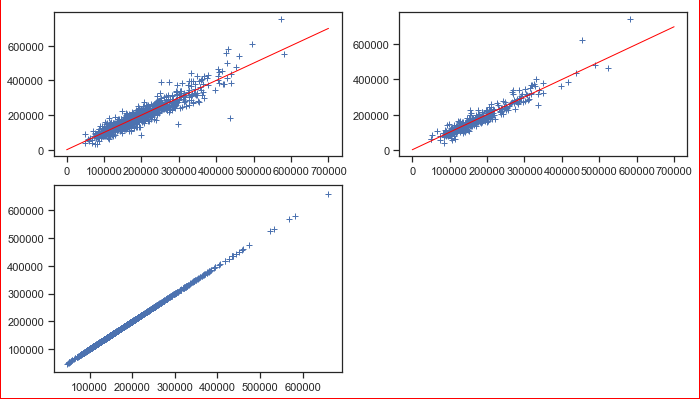

In [39]:
print('XGB RMSE: ',np.sqrt(mean_squared_error(np.log(model.predict(train_X)), np.log(train_y))))
print('XGB RMSE: ',np.sqrt(mean_squared_error(np.log(model.predict(valid_X)), np.log(valid_y))))
fig = plt.figure(figsize=(4,4),edgecolor = 'red',linewidth=2,frameon=True)
ax1 = fig.add_axes([0.0,0.75,1.0,0.5], projection=None, polar=False)
ax1.plot(model.predict(train_X),train_y, marker='+',linewidth=0)
ax1.plot([0,700000],[0,700000], color='red',linewidth=1)
ax2 = fig.add_axes([1.2,0.75,1.0,0.5], projection=None, polar=False)   
ax2.plot(model.predict(valid_X),valid_y, marker='+',linewidth=0)
ax2.plot([0,700000],[0,700000], color='red',linewidth=1)


In [61]:
if skewCorrection:
    estimate = np.exp(model.predict(XTest))
else:
    estimate = model.predict(XTest)
df=pd.DataFrame(dfTest['Id'])
df.insert(1,'SalePrice',estimate)
df.to_csv('house_CT18.csv', index=False)

In [121]:
#Stacking Models
lassoModel   = Lasso(alpha=0.05,random_state=1)
ENetModel    = ElasticNet(alpha=0.05,l1_ratio=.9, random_state=3)
KRRModel     = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
xgboostModel = XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             objective='reg:squarederror',
                             random_state =7, nthread = -1)

feature_names = ['TotalSF',
                 'OverallQual_xx',
                 'GarageCars',
                 'YearBuilt','Fireplaces','CentralAir_xx',
                 'Neighborhood_xx','OverallCond','BedroomAbvGr_xx','BldgType_xx','TotRmsAbvGrd',
                 'LandSlope_xx','LotArea',]

feature_names = ['TotalSF',
                     'OverallQual_xx',
                     'GarageCars',
                     'YearBuilt',
                     'Fireplaces',
                     'CentralAir_xx',
                     'Neighborhood_xx',
                     'OverallCond',
                     'BedroomAbvGr_xx',
                     'BldgType_xx',
                     'TotRmsAbvGrd',
                     'LandSlope_xx',
                     'LotArea',
                     'GrLivArea','FullBath',
                     'GarageType_xx',
                     'KitchenQual_xx','ExterQual_xx',
                     'Heating_xx',
                     'BsmtExposure_xx',
                     'Condition1_xx','ExterCond_xx',
                     'PavedDrive_xx',
                     'Foundation_xx',
                     'SaleType_xx','SaleCondition_xx',
                     #    
                     'MSSubClass','MSZoning_xx','LandContour_xx','HouseStyle_xx',
                     'BsmtCond_xx','Electrical_xx','LotConfig_xx','HeatingQC_xx',
                     'RoofStyle_xx','YearRemodAdd',
                     'BsmtQual_xx','LotShape_xx','MasVnrType_xx',
                     'BsmtFinType1_xx','Functional_xx'
                ]

X = dfTrain[feature_names]
y = dfTrain['SalePrice']
train_X, valid_X, train_y, valid_y = train_test_split(X, y, random_state = 1)
XTest = dfTest[feature_names]

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

xgboostModel.fit(train_X, train_y,early_stopping_rounds=15,eval_set=[(valid_X, valid_y)],verbose=False)
lassoModel.fit(train_X, train_y)
ENetModel.fit(train_X, train_y)
KRRModel.fit(train_X, train_y)

preds_traMix=np.array([None,None,None,None])
preds_valMix=np.array([None,None,None,None])
preds_tesMix=np.array([None,None,None,None])
for k, model in enumerate([xgboostModel,lassoModel,ENetModel,KRRModel]):
    preds_tra = np.maximum(model.predict(train_X),np.min(train_y))
    preds_val = np.maximum(model.predict(valid_X),np.min(valid_y))
    preds_tes = np.maximum(model.predict(XTest),np.min(valid_y))
    
    preds_traMix[k]=preds_tra
    preds_valMix[k]=preds_val
    preds_tesMix[k]=preds_tes

    rmseTrain = np.sqrt(mean_squared_error(np.log(preds_tra), np.log(train_y)))
    rmseValid = np.sqrt(mean_squared_error(np.log(preds_val), np.log(valid_y)))
    print('Model RMSE: ',rmseValid,rmseTrain)
    


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:167: UserWarning:

Singular matrix in solving dual problem. Using least-squares solution instead.



Model RMSE:  0.12342407432245998 0.08344157714453498
Model RMSE:  0.17340925982287925 0.16827846553291953
Model RMSE:  0.17237680750198245 0.16774458877261744
Model RMSE:  0.1806212901985829 0.12142315861940106


In [160]:
dfTrainMix = pd.DataFrame()
dfTrainMix['xgboost'] = preds_traMix[0]
dfTrainMix['lasso']   = preds_traMix[1]
dfTrainMix['enet']    = preds_traMix[2]
dfTrainMix['kkr']     = preds_traMix[3]
dfTrainMix['mean']    = np.mean([dfTrainMix['xgboost'],dfTrainMix['lasso'],dfTrainMix['enet'],dfTrainMix['kkr']])
dfTrainMix['stdev']   = np.std([dfTrainMix['xgboost'],dfTrainMix['lasso'],dfTrainMix['enet'],dfTrainMix['kkr']])

dfValidMix = pd.DataFrame()
dfValidMix['xgboost'] = preds_valMix[0]
dfValidMix['lasso']   = preds_valMix[1]
dfValidMix['enet']    = preds_valMix[2]
dfValidMix['kkr']     = preds_valMix[3]
dfValidMix['mean']    = np.mean([dfValidMix['xgboost'],dfValidMix['lasso'],dfValidMix['enet'],dfValidMix['kkr']])
dfValidMix['stdev']   = np.std([dfValidMix['xgboost'],dfValidMix['lasso'],dfValidMix['enet'],dfValidMix['kkr']])

dfTestMix = pd.DataFrame()
dfTestMix['xgboost'] = preds_tesMix[0]
dfTestMix['lasso']   = preds_tesMix[1]
dfTestMix['enet']    = preds_tesMix[2]
dfTestMix['kkr']     = preds_tesMix[3]
dfTestMix['mean']    = np.mean([dfTestMix['xgboost'],dfTestMix['lasso'],dfTestMix['enet'],dfTestMix['kkr']])
dfTestMix['stdev']   = np.std([dfTestMix['xgboost'],dfTestMix['lasso'],dfTestMix['enet'],dfTestMix['kkr']])

ModelMix = XGBRegressor()
ModelMix.fit(dfTrainMix, train_y)
preds_mixTrain = ModelMix.predict(dfTrainMix)
preds_mixValid = ModelMix.predict(dfValidMix)
preds_mixTest  = ModelMix.predict(dfTestMix)

rmseTrain = np.sqrt(mean_squared_error(np.log(preds_mixTrain), np.log(train_y)))
rmseValid = np.sqrt(mean_squared_error(np.log(preds_mixValid), np.log(valid_y)))
print('Model RMSE: ',rmseValid,rmseTrain)

[00:12:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Model RMSE:  0.12361920048955949 0.06985916799059336


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



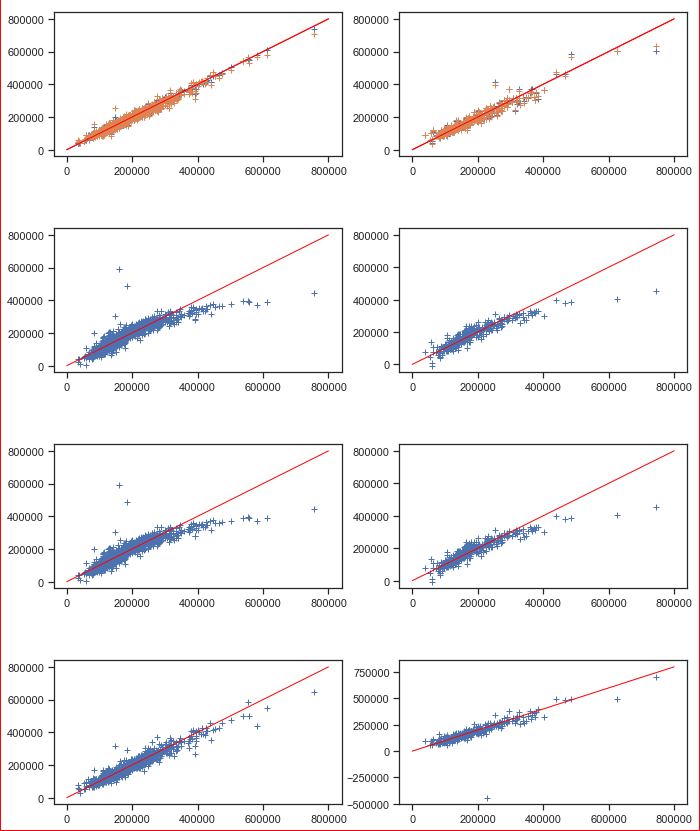

In [159]:
fig = plt.figure(figsize=(4,4),edgecolor = 'red',linewidth=2,frameon=True)
#mix
ax1 = fig.add_axes([0.0,2.25,1.0,0.5], projection=None, polar=False)
ax1.plot(train_y,preds_mixTrain, marker='+',linewidth=0)
ax1.plot([0,800000],[0,800000], color='red',linewidth=1)

ax2 = fig.add_axes([1.2,2.25,1.0,0.5], projection=None, polar=False)   
ax2.plot(valid_y,preds_mixValid, marker='+',linewidth=0)
ax2.plot([0,800000],[0,800000], color='red',linewidth=1)

model=xgboostModel
ax1 = fig.add_axes([0.0,2.25,1.0,0.5], projection=None, polar=False)
ax1.plot(train_y,model.predict(train_X), marker='+',linewidth=0)
ax1.plot([0,800000],[0,800000], color='red',linewidth=1)
ax2 = fig.add_axes([1.2,2.25,1.0,0.5], projection=None, polar=False)   
ax2.plot(valid_y,model.predict(valid_X), marker='+',linewidth=0)
ax2.plot([0,800000],[0,800000], color='red',linewidth=1)
model=lassoModel
ax3 = fig.add_axes([0.0,1.5,1.0,0.5], projection=None, polar=False)
ax3.plot(train_y,model.predict(train_X), marker='+',linewidth=0)
ax3.plot([0,800000],[0,800000], color='red',linewidth=1)
ax4 = fig.add_axes([1.2,1.5,1.0,0.5], projection=None, polar=False)   
ax4.plot(valid_y,model.predict(valid_X), marker='+',linewidth=0)
ax4.plot([0,800000],[0,800000], color='red',linewidth=1)
model=ENetModel
ax5 = fig.add_axes([0.0,0.75,1.0,0.5], projection=None, polar=False)
ax5.plot(train_y,model.predict(train_X), marker='+',linewidth=0)
ax5.plot([0,800000],[0,800000], color='red',linewidth=1)
ax6 = fig.add_axes([1.2,0.75,1.0,0.5], projection=None, polar=False)   
ax6.plot(valid_y,model.predict(valid_X), marker='+',linewidth=0)
ax6.plot([0,800000],[0,800000], color='red',linewidth=1)
model=KRRModel
ax7 = fig.add_axes([0.0,0.0,1.0,0.5], projection=None, polar=False)
ax7.plot(train_y,model.predict(train_X), marker='+',linewidth=0)
ax7.plot([0,800000],[0,800000], color='red',linewidth=1)
ax8 = fig.add_axes([1.2,0.0,1.0,0.5], projection=None, polar=False)   
ax8.plot(valid_y,model.predict(valid_X), marker='+',linewidth=0)
ax8.plot([0,800000],[0,800000], color='red',linewidth=1)

In [161]:
estimate = preds_mixTest #xgboostModel.predict(XTest)
df=pd.DataFrame(dfTest['Id'])
df.insert(1,'SalePrice',estimate)
df.to_csv('house_CT25.csv', index=False)